## 강수량 데이터

In [443]:
## 강수량 전체데이터 전처리

import csv
import pandas as pd

df = pd.read_csv('seoul/강수량.csv', encoding='euc-kr', header=7) 
# 그냥 불러왔을 때 CSV파일에 쓸데 없는 데이터 때문에 에러가 나니 header=7을 통해 csv파일의 7번째 줄부터 데이터를 가져온다.

df = df.drop(['지점명'], axis=1)
df = df.drop(['\t지점번호'], axis=1)
df = df.drop(['1시간최다강수량(mm)'], axis=1)
df = df.drop(['1시간최다강수량시각'], axis=1)
df = df.drop(['Unnamed: 6'], axis=1)
# 내가 원하는 데이터와 상관없는 데이터들은 삭제하여 보기 좋게 데이터를 고친다. 

# df = df.fillna(0)
# df파일에 fillna 메소드를 통해 NA 즉, 데이터가 들어있지 않은 부분의 value를 0으로 변환한다.
# 아주 조금이라도 비가 내린 경우 = 0.0으로 표시, 아예 안 내린 경우 = 0으로 표시

#df = df.dropna
# df파일에 dropna 메소드를 통해 NA 즉, 데이터가 들어있지 않은 부분의 행을 삭제한다.

df.reset_index(inplace=True)
df = df.drop(['index'], axis=1) 
# reset_index 메소드를 실행하면서 생겨난 index column을 삭제한다.

df.rename(columns = {'일시':'날짜'}, inplace=True)
df = df.set_index(['날짜'])
# 보기 좋게 index를 날짜로 설정한다

In [444]:
df

,강수량(mm)
날짜,
2016-01-01,NaN
2016-01-02,NaN
2016-01-03,NaN
2016-01-04,NaN
2016-01-05,NaN
...,...
2020-12-27,0.0
2020-12-28,1.3
2020-12-29,0.2


In [445]:
H = df['강수량(mm)'] >= 80 # 강수량이 80mm 이상인 데이터를 H로 저장 
df[H]

,강수량(mm)
날짜,
2016-07-01,108.5
2016-07-05,100.5
2017-07-02,92.0
2017-07-10,144.5
2017-07-23,133.5
2017-08-15,93.5
2017-08-20,124.5
2018-05-17,83.0
2018-07-01,83.5


In [446]:
M = df['강수량(mm)'] < 80  # 강수량이 80mm 미만인 데이터(0.0 인 날짜들은 비나 눈이 0.00000001mm라도 내린 날들)
df[M]

,강수량(mm)
날짜,
2016-01-13,0.4
2016-01-14,0.0
2016-01-16,0.1
2016-01-18,0.2
2016-01-23,0.0
...,...
2020-12-23,0.0
2020-12-27,0.0
2020-12-28,1.3


In [447]:
Z = df['강수량(mm)'].isnull() # 강수량이 0mm인 데이터
df[Z]

,강수량(mm)
날짜,
2016-01-01,NaN
2016-01-02,NaN
2016-01-03,NaN
2016-01-04,NaN
2016-01-05,NaN
...,...
2020-12-22,NaN
2020-12-24,NaN
2020-12-25,NaN


## 교통사고 데이터

In [448]:
name = ['2016', '2017', '2018', '2019', '2020'] # 각 년도별로 저장한 파일 이름 리스트

In [449]:
a=[] # '사고건수'가 들어갈 리스트
b=[] # '사망자수'가 들어갈 리스트
c=[] # '부상자수'가 들어갈 리스트

for n in name: 
    d = pd.read_excel('seoul/%s.xls'%(n)) # 년도별로 저장한 파일을 불러온다.
    d = d.dropna() # 공백 제거
    for idx in range(0, 4): 
        d = d.drop(idx) # 불필요한 데이터 제거
    del d['%s'%(n)] # 불필요한 열 제거
    d.reset_index(inplace=True, drop=True) # index 재설정(inplace=True를 통해 내용 유지, drop=True를 통해 기존 index 삭제)
    columns = list(d.columns) # d에 들어있는 columns(열) 이름 리스트 생성
    for i in range(len(columns)): # columns리스트 길이만큼 반복
        try: #try except문으로 IndexError 방지
            columns[i] = str(columns[i].split('.')[1]) + '일' # columns의 숫자들에 '일'을 붙여줌
            if len(columns[i]) == 2: # 1일~9일까지를 01일~09일로 변경
                columns[i] = '0'+str(columns[i]) 
        except IndexError:
            continue
    d.columns = columns # d의 columns(열)이름 재설정
    for i in range(0,34,3): # 월-일 마다의 (사고건수, 사망자수, 부상자수)의 값들을 날짜 순으로 각각 a,b,c에 append
        for j in columns[2:]:
            if d[j][i] != '-':
                a.append(d[j][i])
                b.append(d[j][i+1])
                c.append(d[j][i+2])
            else:
                continue

In [450]:
days = pd.date_range(start = '2016-01-01', end = '2020-12-31', freq='D') # 2016-01-01일 부터 2020-12-31까지 일자별로 데이터를 days로 생성
day = []
for i in range(len(days)):
    day.append(str(list(days)[i]).split()[0]) # days에서 년-월-일 의 텍스트만 뽑아와서 day리스트에 저장

In [461]:
accident = pd.DataFrame([day, a, b, c]).T # ('날짜', '사고건수', '사망자수', '부상자수') 데이터들을 데이터 프레임으로 생성
accident.columns =['날짜', '사고건수', '사망자수', '부상자수'] # columns(열)이름 변경
accident = accident.set_index(['날짜']) # index를 ['날짜']의 데이터로 변경
accident.to_csv('교통사고.csv', index=False) # 인덱스 제거하고 저장
accident

,사고건수,사망자수,부상자수
날짜,,,
2016-01-01,66,0,98
2016-01-02,79,1,116
2016-01-03,75,0,118
2016-01-04,107,0,165
2016-01-05,92,0,146
...,...,...,...
2020-12-27,40,0,55
2020-12-28,81,0,110
2020-12-29,71,0,95


## 강수량과 교통사고 발생수의 연관성 찾기

In [462]:
df[M]

,강수량(mm)
날짜,
2016-01-13,0.4
2016-01-14,0.0
2016-01-16,0.1
2016-01-18,0.2
2016-01-23,0.0
...,...
2020-12-23,0.0
2020-12-27,0.0
2020-12-28,1.3


In [463]:
df[H].index

Index(['2016-07-01', '2016-07-05', '2017-07-02', '2017-07-10', '2017-07-23',
       '2017-08-15', '2017-08-20', '2018-05-17', '2018-07-01', '2018-08-28',
       '2020-07-23', '2020-08-03', '2020-08-11', '2020-11-19'],
      dtype='object', name='날짜')

In [464]:
df[M].index

Index(['2016-01-13', '2016-01-14', '2016-01-16', '2016-01-18', '2016-01-23',
       '2016-01-26', '2016-02-11', '2016-02-12', '2016-02-13', '2016-02-14',
       ...
       '2020-11-27', '2020-12-10', '2020-12-13', '2020-12-17', '2020-12-18',
       '2020-12-23', '2020-12-27', '2020-12-28', '2020-12-29', '2020-12-31'],
      dtype='object', name='날짜', length=690)

In [465]:
df[Z].index

Index(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04', '2016-01-05',
       '2016-01-06', '2016-01-07', '2016-01-08', '2016-01-09', '2016-01-10',
       ...
       '2020-12-15', '2020-12-16', '2020-12-19', '2020-12-20', '2020-12-21',
       '2020-12-22', '2020-12-24', '2020-12-25', '2020-12-26', '2020-12-30'],
      dtype='object', name='날짜', length=1123)

In [466]:
z = []
for i in df[Z].index : # 강수량이 0mm인 데이터들을 모아둔 Z의 인덱스와 accident의 인덱스를 비교한다. 즉, 두 데이터에서 날짜(인덱스)가 같은 날들의 데이터만 뽑아내서 z로 저장한다.
    for j in accident.index :
        if i == j:
            z.append(accident.loc[j]) # .loc[]를 통해 내가 지정한 index에 해당하는 값을 가져올 수 있다.
            
m = []
for i in df[M].index :
    for j in accident.index :
        if i == j:
            m.append(accident.loc[j])
        
h = []
for i in df[H].index :
    for j in accident.index :
        if i == j:
            h.append(accident.loc[j])

In [467]:
len(h)

14

In [468]:
# 강수량이 80mm 이상인 날

accident_total = 0
death_total = 0
injury_total = 0
for i in range(len(h)):
    accident_total += h[i]['사고건수']
    death_total += h[i]['사망자수']
    injury_total += h[i]['부상자수']

print(accident_total/len(h)) # 평균 사고건수
print(death_total / len(h)) # 평균 사망자수
print(injury_total / len(h)) # 평균 부상자수

109.57142857142857
0.6428571428571429
156.85714285714286


In [469]:
# 강수량이 0mm인 날

zero_accident_total = 0
zero_death_total = 0
zero_injury_total = 0
for i in range(len(z)):
    zero_accident_total += z[i]['사고건수']
    zero_death_total += z[i]['사망자수']
    zero_injury_total += z[i]['부상자수']

print(zero_accident_total/len(z)) # 평균 사고건수
print(zero_death_total / len(z)) # 평균 사망자수
print(zero_injury_total / len(z)) # 평균 부상자수

104.81656277827248
0.7693677649154052
144.20035618878006


In [470]:
# 강수량이 80mm 미만인 날

Middle_accident_total = 0
Middle_death_total = 0
Middle_injury_total = 0
for i in range(len(m)):
    Middle_accident_total += m[i]['사고건수'] 
    Middle_death_total += m[i]['사망자수']
    Middle_injury_total += m[i]['부상자수']

print(Middle_accident_total/len(m)) # 평균 사고건수
print(Middle_death_total / len(m)) # 평균 사망자수
print(Middle_injury_total / len(m)) # 평균 부상자수

105.36376811594202
0.8565217391304348
145.67246376811593


In [ ]:
zero_accident_total,Middle_accident_total,accident_total

In [471]:
zero = [zero_accident_total/len(z), zero_death_total/len(z), zero_injury_total/len(z)]
middle = [Middle_accident_total/len(m), Middle_death_total/len(m), Middle_injury_total/len(m)]
high = [accident_total/len(h), death_total/len(h), injury_total/len(h)]

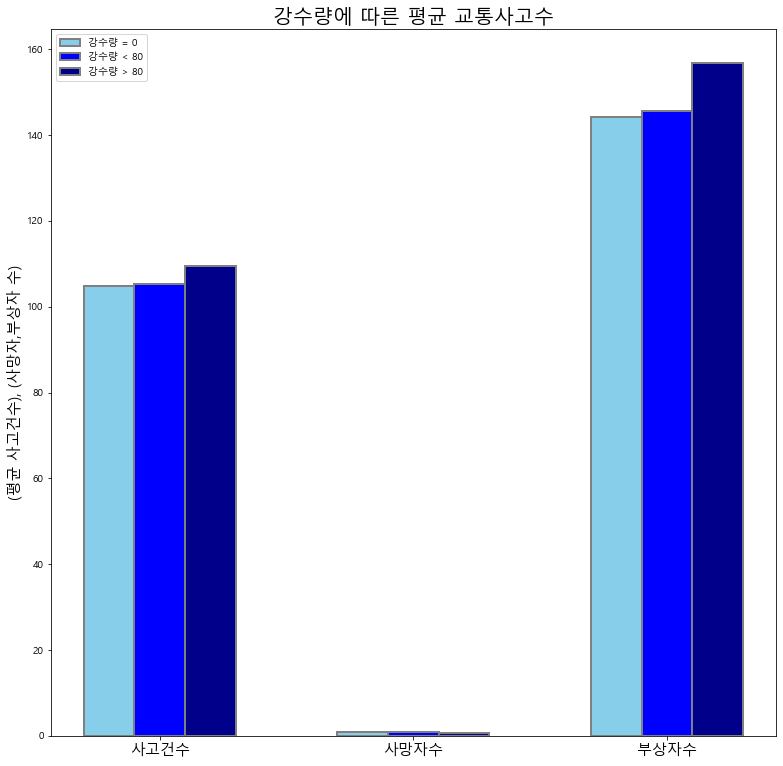

In [525]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import platform 

#한글표시
if platform.system() == 'Windows': 
    matplotlib.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Darwin': # Mac 
    matplotlib.rc('font', family='AppleGothic') 
else: #linux 
    matplotlib.rc('font', family='NanumGothic') 

# 그래프에 마이너스 표시가 되도록 변경 
matplotlib.rcParams['axes.unicode_minus'] = False

r = ['사고건수', '사망자수', '부상자수']
x = np.arange(len(zero)) # 그래프에 나타날 그룹형 막대의 개수
plt.figure(figsize=(13,13)) # 그래프의 사이즈
plt.bar(x-0.2, zero, label='강수량 = 0', width=0.2, color='skyblue',edgecolor='gray', linewidth=2)# 강수량이 0인데이터들을 막대로 나타낸다. label은 막대가 나타내는 데이터의 이름, width는 막대의 폭 color는 색상지정
plt.bar(x-0.0, middle, label='강수량 < 80', width=0.2, color='blue',edgecolor='gray', linewidth=2)
plt.bar(x+0.2, high, label='강수량 > 80', width=0.2, color='darkblue',edgecolor='gray', linewidth=2)
plt.title('강수량에 따른 평균 교통사고수', fontsize=20) # 그래프의 제목
plt.xticks(x, r, fontsize=15) # 여기서 r은 각 그룹형 막대그래프가 나타낼 데이터들의 이름
plt.ylabel('(평균 사고건수), (사망자,부상자 수)', fontsize=15) # y축이 무엇을 나타내는지 알려주기 위한 글을 적는 곳
plt.legend() # 각 막대 그래프가 어떤 데이터를 나타내는지 분류해서 보여줌
plt.savefig('강수량과 교통사고의 연관성.jpg')

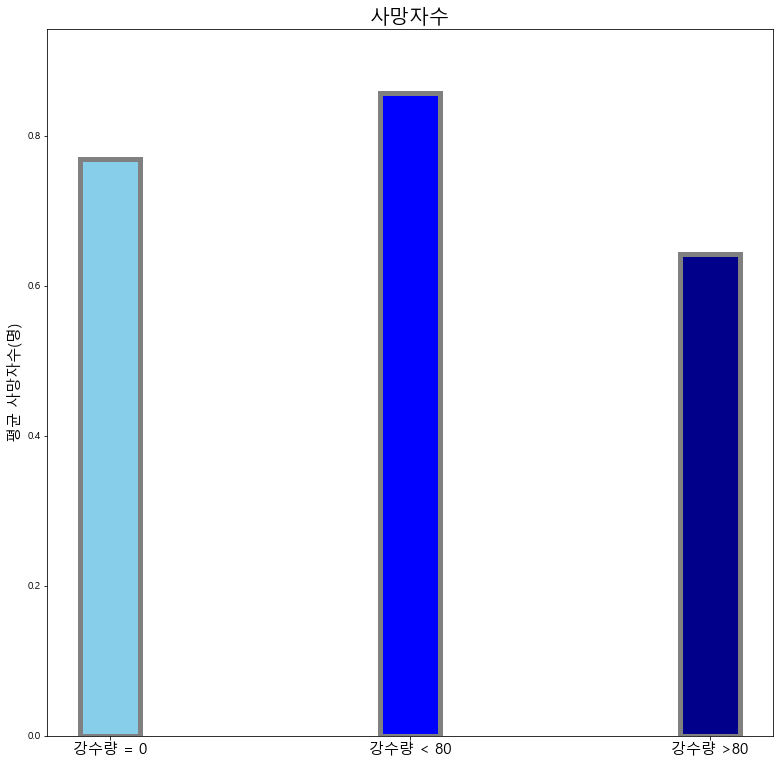

In [524]:
number_of_accidents = [zero_death_total/len(z), Middle_death_total/len(m), death_total/len(h)]
plt.figure(figsize=(13,13))
plt.title("사망자수", fontsize=20)
plt.bar(x, number_of_accidents, width=0.2, color=['skyblue', 'blue', 'darkblue'], edgecolor='gray', linewidth=5)
plt.ylim(0, max(number_of_accidents)*1.1)
plt.xticks(x, ['강수량 = 0', '강수량 < 80', '강수량 >80'], fontsize=15)
plt.ylabel('평균 사망자수(명)', fontsize=15)
plt.savefig('평균 사망자수')